In [8]:
import sys, os
sys.path.append(os.path.abspath(".."))

import torch
from models.lstm_attention import BiLSTMWithAttention
import matplotlib.pyplot as plt

In [9]:
# Simulate the feature sequence output by MobileNetV3
dummy_input = torch.randn(2, 20, 960)  # B=2, T=20, D=960
print("import shape:", dummy_input.shape)

import shape: torch.Size([2, 20, 960])


In [10]:
model = BiLSTMWithAttention(input_dim=960, hidden_dim=256, num_classes=300)
model.eval()

with torch.no_grad():
    logits, attn_weights = model(dummy_input)

print("logits shape:", logits.shape)           # [2, 300]
print("attention shape:", attn_weights.shape)  # [2, 30, 1]

logits shape: torch.Size([2, 300])
attention shape: torch.Size([2, 20, 1])


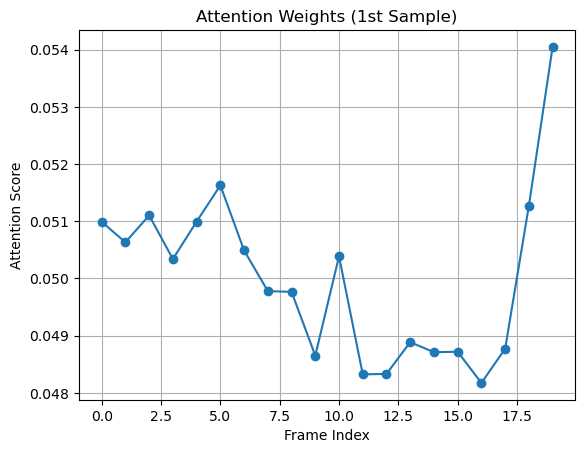

In [11]:
# Visualize the Attention of the first sample
weights = attn_weights[0].squeeze().cpu().numpy()

plt.plot(weights, marker='o')
plt.title("Attention Weights (1st Sample)")
plt.xlabel("Frame Index")
plt.ylabel("Attention Score")
plt.grid(True)
plt.show()